<a href="https://colab.research.google.com/github/Olamilekan002/Hamoye-Data-Science-Internship/blob/main/STAGE_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stage E Assessment

In [ ]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

#load data
path = 'https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv'
df = pd.read_csv(path)
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
df[ "FullDate" ] = pd.to_datetime(df[ "FullDate" ]) #convert column to datetime
df.set_index( "FullDate" , inplace= True )

In [ ]:

#data resampling from hr to day
df_day = df.resample('D').sum()

In [ ]:
df_day.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [ ]:
df_day.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,3.834000e+03,3834.000000,3834.000000,3834.000000
mean,5.560721e+03,19142.960568,144.387902,1579.160554
std,1.095048e+05,11776.474105,62.602608,2290.321587
min,2.376000e+02,-14631.136000,0.000000,-2538.025000
25%,4.152000e+02,10944.937575,94.485600,782.007500
50%,5.256000e+02,20339.274975,123.974400,1241.140000
75%,6.624000e+02,28158.326725,192.546000,1935.403750
max,2.399998e+06,53541.383300,719.760000,80606.400000


### Visualisation of trend and seasonality

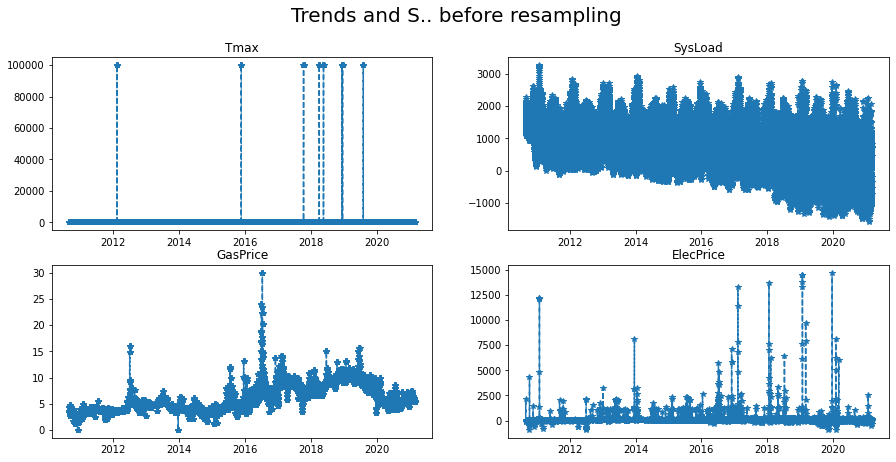

<Figure size 720x216 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(2, 2, figsize = (15,7))
axs[0, 0].plot(df.index, df.Tmax, '--' , marker= '*' , )
axs[0, 0].set_title('Tmax')
axs[0, 1].plot(df.index, df.SysLoad, '--' , marker= '*' , )
axs[0, 1].set_title('SysLoad')
axs[1, 0].plot(df.index, df.GasPrice, '--' , marker= '*' , )
axs[1, 0].set_title('GasPrice')
axs[1, 1].plot(df.index, df.ElecPrice, '--' , marker= '*' , )
axs[1, 1].set_title('ElecPrice')

plt.suptitle('Trends and S.. before resampling', fontsize = 20)
plt.figure(figsize=(10,3));

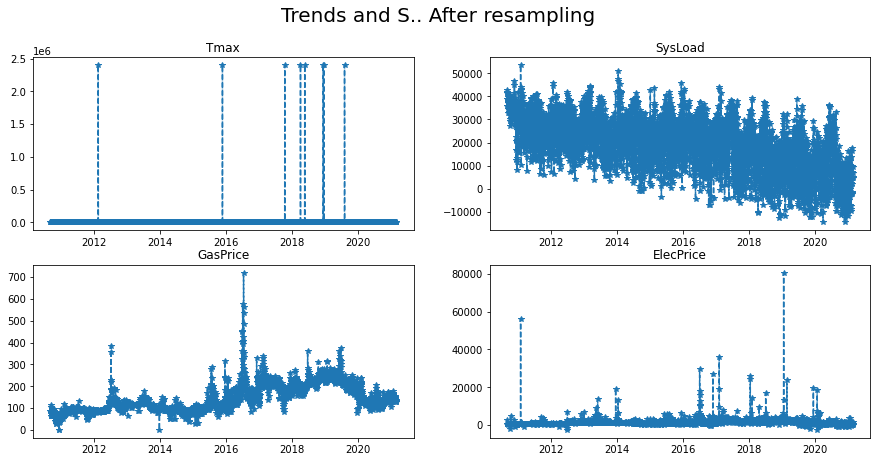

<Figure size 720x216 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(2, 2, figsize = (15,7))
axs[0, 0].plot(df_day.index, df_day.Tmax, '--' , marker= '*' , )
axs[0, 0].set_title('Tmax')
axs[0, 1].plot(df_day.index, df_day.SysLoad, '--' , marker= '*' , )
axs[0, 1].set_title('SysLoad')
axs[1, 0].plot(df_day.index, df_day.GasPrice, '--' , marker= '*' , )
axs[1, 0].set_title('GasPrice')
axs[1, 1].plot(df_day.index, df_day.ElecPrice, '--' , marker= '*' , )
axs[1, 1].set_title('ElecPrice')

plt.suptitle('Trends and S.. After resampling', fontsize = 20)
plt.figure(figsize=(10,3));

### Univariate Model

In [ ]:
df_day = df_day.reset_index()

In [ ]:

#data spliting
# X = df_day[['FullDate', 'ElecPrice']]
df_day.rename(columns={"FullDate": "ds", "ElecPrice": "y"}, inplace = True) 
X = df_day[['ds', 'y']]
train = X[:2757]

test = X[2757:]

#validating the split
print('Train is %s and test is %s'%(len(train), len(test)))

Train is 2757 and test is 1077


In [ ]:
train.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [ ]:
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# df_day_test = df_day[['ds', 'Tmax', 'SysLoad', 'GasPrice']][2757:]
forecast = model.predict(test)

In [ ]:
from math import sqrt
y_true = test['y']
y_pred = forecast['yhat']

mse = mean_squared_error(y_true, y_pred)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

In [ ]:
#evaluation
print('The mse is',mse)
print('The rmse is', rmse)
print('The mape is',mape *100)
print('The mae is', mae)

The mse is 10356526.60190019
The rmse is 3218.15577651241
The mape is 549.4751413716547
The mae is 1748.5192459342127


In [ ]:
def mape_func(y_true, y_pred):
   return sum(np.abs((y_true.values - y_pred.values)/y_true.values)) / len(y_true)*100

In [ ]:
forecast[['ds', 'yhat']].head()

,ds,yhat
0,2018-03-20,2536.337494
1,2018-03-21,2689.655459
2,2018-03-22,2788.705741
3,2018-03-23,2580.977221
4,2018-03-24,2256.367941


### Multivariate Model

In [ ]:
model_mul = Prophet()
model_mul.add_regressor('Tmax')
model_mul.add_regressor('SysLoad')
model_mul.add_regressor('GasPrice')
model_mul.fit(df_day[:2757])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df_day_test = df_day[['ds', 'Tmax', 'SysLoad', 'GasPrice']][2757:]
forecast1 = model_mul.predict(df_day_test)

In [ ]:
forecast1[['ds', 'yhat']]

,ds,yhat
0,2018-03-20,1985.928781
1,2018-03-21,1977.305515
2,2018-03-22,2897.552092
3,2018-03-23,2581.732539
4,2018-03-24,1434.764330
...,...,...
1072,2021-02-24,953.896217
1073,2021-02-25,1313.507388
1074,2021-02-26,1377.373852
1075,2021-02-27,1032.301956


In [ ]:
from math import sqrt
y_true_mul = df_day['y'][2757:]
y_pred_mul = forecast1['yhat']

mse_mul = mean_squared_error(y_true_mul, y_pred_mul)
rmse_mul = sqrt(mse_mul)
mape_mul = mean_absolute_percentage_error(y_true_mul, y_pred_mul)
mae_mul = mean_absolute_error(y_true_mul, y_pred_mul)

In [ ]:
print('The mse is',mse_mul)
print('The rmse score is', rmse_mul)
print('The mape score is', mape_mul*100)
print('The MAE score is', mae_mul)

The mse is 7328041.505055476
The rmse score is 2707.0355566662724
The mape score is 231.38342496094398
The MAE score is 984.216456600714


In [ ]:
mape_func(y_true_mul, y_pred_mul)

231.383424960944

### Other Multivariate model

In [ ]:
model_mul1 = Prophet()
model_mul1.add_regressor('SysLoad')
model_mul1.add_regressor('GasPrice')
model_mul1.fit(df_day[:2757])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df_day_test1 = df_day[['ds', 'SysLoad', 'GasPrice']][2757:]
forecast2 = model_mul1.predict(df_day_test1)

In [ ]:
from math import sqrt
y_true_mul = df_day['y'][2757:]
y_pred_mul2 = forecast2['yhat']

mse_mul1 = mean_squared_error(y_true_mul, y_pred_mul2)
rmse_mul1 = sqrt(mse_mul1)
mape_mul1 = mean_absolute_percentage_error(y_true_mul, y_pred_mul2)
mae_mul1 = mean_absolute_error(y_true_mul, y_pred_mul2)

In [ ]:
print('The mse is',mse_mul1)
print('The rmse score is', rmse_mul1)
print('The mape score is', mape_mul1*100)
print('The MAE score is', mae_mul1)

The mse is 7360010.968370907
The rmse score is 2712.934014746932
The mape score is 236.66321133599126
The MAE score is 1003.6214646918181


### ADF Statistics of Features

In [ ]:
#Adf Statistics of GasPrice
adf_result = adfuller(df_day['GasPrice']);
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -2.90276669716518
p-value: 0.04502721288462542
No. of lags used: 27
No. of observations used : 3806
Critical Values:
   1%: -3.4320693157877544
   5%: -2.8622996992165364
   10%: -2.5671743978048323


In [ ]:
#Adf Statistics of ElecPrice
adf_result = adfuller(df_day['y'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -8.269053866873803
p-value: 4.848817773711633e-13
No. of lags used: 20
No. of observations used : 3813
Critical Values:
   1%: -3.432066157296446
   5%: -2.8622983040036005
   10%: -2.5671736550459663


In [ ]:
#Adf Statistics of SysLoad
adf_result = adfuller(df_day['SysLoad'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -3.6901589888366457
p-value: 0.004253725504574117
No. of lags used: 30
No. of observations used : 3803
Critical Values:
   1%: -3.432070672988693
   5%: -2.8623002987378547
   10%: -2.567174716967499


In [ ]:
#ADF Statistics of Tmax
adf_result = adfuller(df_day['Tmax'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -20.766001357159357
p-value: 0.0
No. of lags used: 6
No. of observations used : 3827
Critical Values:
   1%: -3.4320598750004825
   5%: -2.862295528895607
   10%: -2.567172177683642
